<a href="https://colab.research.google.com/github/Shivam4681/DeepLearning/blob/main/Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Import Files

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step 2: Read The Dataset

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Shivam4681/DeepLearning/main/PowerPlant.csv'
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Step 3: Perform Basic Data Quality Check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.isna()

,AT,V,AP,RH,PE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9563,False,False,False,False,False
9564,False,False,False,False,False
9565,False,False,False,False,False
9566,False,False,False,False,False


In [ ]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
df.duplicated().sum()

41

In [ ]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [ ]:
df = df.drop_duplicates(keep='first')
df.shape

(9527, 5)

## Seprate X And Y

In [ ]:
x = df.drop(columns=['PE'])
y = df['PE']

In [ ]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
y.head()

0    480.48
1    445.75
2    438.76
3    453.09
4    464.43
Name: PE, dtype: float64

## Step 4: Process X Using Pipeline

In [ ]:
x.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

There is no any Categorical value Thats way we perform only numerical value.<br>
numerial = StabdardScaler <br>
categorical = OrdibalEncoder

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform='pandas')

In [ ]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Applay Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=42)

In [ ]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [ ]:
ytrain.head()

5703    446.68
7322    483.54
9105    461.71
6436    437.38
6790    463.71
Name: PE, dtype: float64

In [ ]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [ ]:
ytest.head()

1087    429.38
6319    485.29
8052    480.40
9524    452.30
4463    446.47
Name: PE, dtype: float64

In [ ]:
xtrain.shape

(7621, 4)

In [ ]:
xtest.shape

(1906, 4)

In [ ]:
xtrain.shape[1]

4

## Step 5: Built The Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [ ]:
# Intialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense Hidden Layer 1
model.add(Dense(16, activation='relu'))

# Add Hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))


In [ ]:
# Compile the model
model.compile(loss="mse", metrics=["mae"], optimizer="adam")

In [ ]:
hist = model.fit(xtrain, ytrain,
                 validation_data=(xtest, ytest),
                 epochs=60)

Epoch 1/60
239/239 [==============================] - 6s 8ms/step - loss: 203897.0469 - mae: 451.1832 - val_loss: 198209.5781 - val_mae: 444.7197
Epoch 2/60
239/239 [==============================] - 2s 7ms/step - loss: 180638.9219 - mae: 423.6612 - val_loss: 153763.0625 - val_mae: 389.6140
Epoch 3/60
239/239 [==============================] - 1s 5ms/step - loss: 117780.2188 - mae: 333.8031 - val_loss: 79716.1719 - val_mae: 265.9985
Epoch 4/60
239/239 [==============================] - 1s 6ms/step - loss: 55576.9766 - mae: 214.2012 - val_loss: 34785.1797 - val_mae: 166.4818
Epoch 5/60
239/239 [==============================] - 1s 4ms/step - loss: 25826.6582 - mae: 140.4234 - val_loss: 17792.8008 - val_mae: 113.8666
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 15067.1133 - mae: 104.3502 - val_loss: 12137.0957 - val_mae: 92.9971
Epoch 7/60
239/239 [==============================] - 1s 4ms/step - loss: 10635.6387 - mae: 86.7510 - val_loss: 8757.3848 - val_mae:

In [ ]:
hist.history["loss"]

[203897.046875,
 180638.921875,
 117780.21875,
 55576.9765625,
 25826.658203125,
 15067.11328125,
 10635.638671875,
 7504.59228515625,
 5113.52490234375,
 3495.736572265625,
 2471.091552734375,
 1784.1109619140625,
 1301.5067138671875,
 948.6119384765625,
 686.6434936523438,
 488.66754150390625,
 345.32049560546875,
 248.81422424316406,
 184.1749725341797,
 139.96319580078125,
 108.79293823242188,
 85.73444366455078,
 68.4661865234375,
 55.429134368896484,
 45.94321060180664,
 38.92898178100586,
 34.03167724609375,
 30.31171226501465,
 27.8413028717041,
 25.87098503112793,
 24.514019012451172,
 23.446918487548828,
 22.66437530517578,
 22.205795288085938,
 21.784889221191406,
 21.382219314575195,
 21.134611129760742,
 20.93912124633789,
 20.703426361083984,
 20.564762115478516,
 20.568843841552734,
 20.374910354614258,
 20.36687469482422,
 20.291107177734375,
 20.23261833190918,
 20.247875213623047,
 20.19438362121582,
 20.08892250061035,
 20.15566062927246,
 20.046512603759766,
 20.123

In [ ]:
hist.history['val_loss']

[198209.578125,
 153763.0625,
 79716.171875,
 34785.1796875,
 17792.80078125,
 12137.095703125,
 8757.384765625,
 6063.79345703125,
 4098.56689453125,
 2855.130859375,
 2038.1243896484375,
 1486.18505859375,
 1083.8792724609375,
 787.3935546875,
 565.3731689453125,
 399.8709411621094,
 284.3819274902344,
 208.1743621826172,
 156.9485321044922,
 121.06270599365234,
 95.36089324951172,
 75.60150146484375,
 60.644134521484375,
 49.67979049682617,
 41.52581787109375,
 35.62580108642578,
 31.627666473388672,
 28.771211624145508,
 26.067909240722656,
 24.4303035736084,
 23.195432662963867,
 22.272659301757812,
 22.384613037109375,
 21.149351119995117,
 20.828998565673828,
 20.820098876953125,
 20.513351440429688,
 20.238521575927734,
 20.211441040039062,
 20.054533004760742,
 19.917999267578125,
 19.84150505065918,
 19.742584228515625,
 19.716196060180664,
 19.75269889831543,
 19.782243728637695,
 19.920419692993164,
 20.209455490112305,
 19.718809127807617,
 20.476673126220703,
 19.80087852

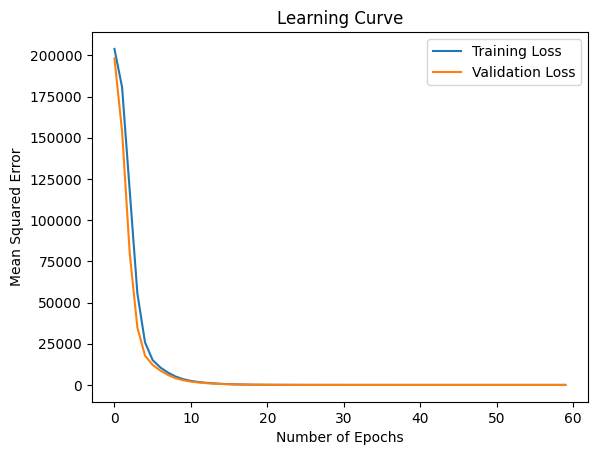

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [ ]:
model.evaluate(xtrain, ytrain)

239/239 [==============================] - 1s 2ms/step - loss: 19.7693 - mae: 3.4359


[19.76927947998047, 3.4358532428741455]

In [ ]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 2ms/step - loss: 19.5968 - mae: 3.4481


[19.596803665161133, 3.448094367980957]

### Predict the result for train and test

In [ ]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 1ms/step


In [ ]:
ypred_train[0:5]

array([[449.89697],
       [479.12247],
       [468.59366],
       [431.10025],
       [466.6458 ]], dtype=float32)

In [ ]:
ytrain.head()

5703    446.68
7322    483.54
9105    461.71
6436    437.38
6790    463.71
Name: PE, dtype: float64

In [ ]:
ypred_test[0:5]

array([[429.12518],
       [480.9762 ],
       [481.38104],
       [449.5138 ],
       [445.25348]], dtype=float32)

In [ ]:
ytest.head()

1087    429.38
6319    485.29
8052    480.40
9524    452.30
4463    446.47
Name: PE, dtype: float64

In [ ]:
# R2 score in train
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.9312193576458585

In [ ]:
# R2 Score in test
r2_score(ytest, ypred_test)

0.9350646960527124

#### Because I have r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [ ]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [ ]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [ ]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [ ]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 2ms/step


array([[443.61108],
       [437.8828 ],
       [431.51328],
       [438.2305 ],
       [472.5193 ]], dtype=float32)

In [ ]:
xnew["PowerOutput_pred"] = preds
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,443.611084
1,28.88,54.89,1007.16,46.60,437.882812
2,27.89,73.21,1001.32,85.88,431.513275
3,25.69,62.26,1011.38,74.08,438.230499
4,12.16,40.81,1025.79,70.97,472.519287
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,434.920807
96,11.78,39.96,1011.37,82.95,472.301941
97,5.62,41.38,1020.91,86.21,484.696594
98,24.96,74.99,1008.25,80.52,434.265991


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

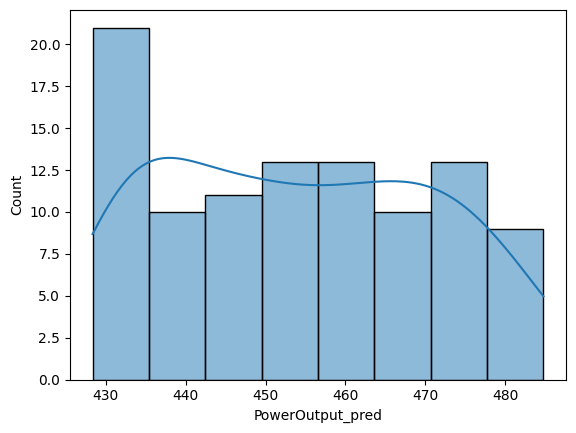

In [ ]:
import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred", kde=True)

In [ ]:
xnew.to_csv('Result.csv', index=False)